##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 6

---

***Full names of all students in the team***: SHASHANK SAI ALLADI, RAGHAV SARDA, ANISH KARAR, RISHITH DAMANI, SHOUNAK ACHARYA

---
***Id number of all students in the team:*** 2021A7PS1507H, 2021A7PS2765H, 2021A3PS0970H, 2021A3PS2147H, 2021AAPS2120H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


# Ignore all warnings for the entire script
warnings.simplefilter('ignore')

In [2]:
# Reading the CSV file as a DataFrame
cred_data = pd.read_csv('/content/Economic_Growth_Trend.csv', header=None)

#Adding a header row for each attribute of dataset for readability
header=attribute_names = [
    'Status of existing checking account (A)',
    'Duration in month (B)',
    'Credit history (C)',
    'Purpose (D)',
    'Credit amount (E)',
    'Savings account/bonds (F)',
    'Present employment since (G)',
    'Installment rate in percentage of disposable income (H)',
    'Personal status and sex (I)',
    'Other debtors / guarantors (J)',
    'Present residence since (K)',
    'Property (L)',
    'Age in years (M)',
    'Other installment plans (N)',
    'Housing (0)',
    'Number of existing credits at this bank (P)',
    'Job (Q)',
    'Number of people being liable to provide maintenance for (R)',
    'Telephone (S)',
    'Foreign worker (T)',
    'Customer classification (U)'
]


cred_data.columns=header

# Displaying the first 5 rows of our DataFrame
cred_data.head()


,Status of existing checking account (A),Duration in month (B),Credit history (C),Purpose (D),Credit amount (E),Savings account/bonds (F),Present employment since (G),Installment rate in percentage of disposable income (H),Personal status and sex (I),Other debtors / guarantors (J),...,Property (L),Age in years (M),Other installment plans (N),Housing (0),Number of existing credits at this bank (P),Job (Q),Number of people being liable to provide maintenance for (R),Telephone (S),Foreign worker (T),Customer classification (U)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
print(cred_data.shape)

(1000, 21)


In [4]:
# Extracting the feature data from the DataFrame 'cred_data'.
X=cred_data.iloc[:,:-1].values

# Extracting the target or label data from the DataFrame 'cred_data'.
Y=cred_data.iloc[:,-1].values


In [5]:
# Defining a custom train_test_split function
def custom_train_test_split(X, Y, test_size=0.25, random_state=None, shuffle=True):
    if random_state is not None:
        np.random.seed(random_state)

    # Determining the number of samples for our test set
    num_test_samples = int(len(X) * test_size)

    if shuffle:
        # Shuffling the data randomly
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]

    # Spliting the data into training and test sets
    X_train, X_test = X[:-num_test_samples], X[-num_test_samples:]
    y_train, y_test = Y[:-num_test_samples], Y[-num_test_samples:]

    return X_train, X_test, y_train, y_test

# Spliting the data using custom function
X_train, X_test, y_train, y_test = custom_train_test_split(X, Y, random_state=2120, test_size=0.25, shuffle=True)


In [6]:
print(y_train)

[2 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1
 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1
 1 1 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 1 2 1 1 1 1 2 2 1 2 1 2 1 2
 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2
 1 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2
 1 2 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2
 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 2 1 2 1 2 1 1 1 2 2 1 2 1 2 1 1
 1 2 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 2 2 1
 1 1 1 2 1 2 1 1 1 2 1 2 2 2 1 2 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 2 1 1 

In [7]:
#Discretizing some of the continuous features values using equal width binning

def discretize_feature_with_ranges(array, feature_index, num_buckets):
    # Extract the specified feature column
    feature_column = array[:, feature_index]

    # Calculate the bin edges for equal-width binning
    bin_edges = np.linspace(min(feature_column), max(feature_column), num=num_buckets+1)

    # Perform binning using digitize
    digitized_feature = np.digitize(feature_column, bin_edges, right=True)

    # Replace the feature column with the discretized values
    array[:, feature_index] = digitized_feature

    # Calculate and print the ranges in each assigned bucket
    ranges_in_buckets = []
    for i in range(1, num_buckets + 1):
        bucket_range = (bin_edges[i - 1], bin_edges[i])
        ranges_in_buckets.append(bucket_range)
        print(f"Bucket {i}: {bucket_range}")



In [8]:
discretize_feature_with_ranges(X_train, 1, 6)

Bucket 1: (4.0, 13.333333333333334)
Bucket 2: (13.333333333333334, 22.666666666666668)
Bucket 3: (22.666666666666668, 32.0)
Bucket 4: (32.0, 41.333333333333336)
Bucket 5: (41.333333333333336, 50.66666666666667)
Bucket 6: (50.66666666666667, 60.0)


In [9]:
discretize_feature_with_ranges(X_train, 4, 6)

Bucket 1: (276.0, 3300.6666666666665)
Bucket 2: (3300.6666666666665, 6325.333333333333)
Bucket 3: (6325.333333333333, 9350.0)
Bucket 4: (9350.0, 12374.666666666666)
Bucket 5: (12374.666666666666, 15399.333333333332)
Bucket 6: (15399.333333333332, 18424.0)


In [10]:
discretize_feature_with_ranges(X_train, 12, 6)

Bucket 1: (19.0, 28.166666666666664)
Bucket 2: (28.166666666666664, 37.33333333333333)
Bucket 3: (37.33333333333333, 46.5)
Bucket 4: (46.5, 55.666666666666664)
Bucket 5: (55.666666666666664, 64.83333333333333)
Bucket 6: (64.83333333333333, 74.0)


In [11]:
discretize_feature_with_ranges(X_test, 1, 6)

Bucket 1: (4.0, 15.333333333333334)
Bucket 2: (15.333333333333334, 26.666666666666668)
Bucket 3: (26.666666666666668, 38.0)
Bucket 4: (38.0, 49.333333333333336)
Bucket 5: (49.333333333333336, 60.66666666666667)
Bucket 6: (60.66666666666667, 72.0)


In [12]:
discretize_feature_with_ranges(X_test, 4, 6)

Bucket 1: (250.0, 2865.8333333333335)
Bucket 2: (2865.8333333333335, 5481.666666666667)
Bucket 3: (5481.666666666667, 8097.5)
Bucket 4: (8097.5, 10713.333333333334)
Bucket 5: (10713.333333333334, 13329.166666666668)
Bucket 6: (13329.166666666668, 15945.0)


In [13]:
discretize_feature_with_ranges(X_test, 12, 6)

Bucket 1: (19.0, 28.333333333333336)
Bucket 2: (28.333333333333336, 37.66666666666667)
Bucket 3: (37.66666666666667, 47.0)
Bucket 4: (47.0, 56.333333333333336)
Bucket 5: (56.333333333333336, 65.66666666666667)
Bucket 6: (65.66666666666667, 75.0)


In [14]:
def calculate_confusion_matrix(actual, predicted, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for a, p in zip(actual, predicted):
        cm[a-1][p-1] += 1

    return cm

In [15]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='w')

    plt.show()



# ***2. ML Model 1***

### **NAIVE BAYE'S CLASSIFICATION**

Naive Bayes classification is a probabilistic machine learning technique that uses the Bayesian probability theory, specifically designed for classification tasks. The fundamental concept behind Naive Bayes is the application of Bayes' theorem with the "naive" assumption that features are conditionally independent given the class label. This independence assumption simplifies the computation of the probability of a particular class given a set of feature values. Naive Bayes models are commonly used in natural language processing, spam filtering, and other classification tasks. The simplicity and speed of Naive Bayes make it a popular choice for real-world applications, especially when dealing with large datasets.

In [16]:
def numberOf_customer(custClass):
    ans = 0

    # Count occurrences of custClass in y_train
    for i in range(len(y_train)):
        if y_train[i] == custClass:
            ans = ans + 1

    return ans


In [17]:
def P_feature_given_customer(index, feature, custClass):
    number_of_feature = 0

    # Count occurrences of feature for the given custClass in X_train and y_train
    for i in range(len(X_train)):
        if (X_train[i][index] == feature) and (y_train[i] == custClass):
            number_of_feature = number_of_feature + 1

    # Calculate conditional probability P(feature | custClass)
    prob = number_of_feature / numberOf_customer(custClass)

    return prob


In [18]:
def probability(X, custClass):
    # Calculate prior probability P(Customer)
    P_Customer = numberOf_customer(custClass) / len(y_train)

    # Initialize conditional probability P(tuple | Customer)
    P_tuple_given_customer = 1

    # Calculate conditional probability for each feature in X
    for i in range(len(X_train[0])):
        P_tuple_given_customer *= P_feature_given_customer(i, X[i], custClass)

    # Calculate and return the total probability
    return P_tuple_given_customer * P_Customer


In [19]:
def naive_bayes(X):
    # Calculate probabilities for good and bad customers given the tuple X
    P_goodCustomer_given_tuple = probability(X, 1)
    P_badCustomer_given_tuple = probability(X, 2)

    # Determine the predicted class based on probabilities
    if P_goodCustomer_given_tuple > P_badCustomer_given_tuple:
        return 1
    else:
        return 2


In [20]:
accuracy = 0

# Iterate through the test set to make predictions and calculate accuracy
for i in range(len(X_test)):
    pred = naive_bayes(X_test[i])  # Make prediction for the current sample
    actual = y_test[i]  # Get the actual label

    # Check if prediction matches the actual label and update accuracy count
    if pred == actual:
        accuracy = accuracy + 1

# Calculate and print the accuracy percentage
accuracy = accuracy / len(y_test)
print(f"Accuracy: {accuracy * 100}%")


Accuracy: 74.8%


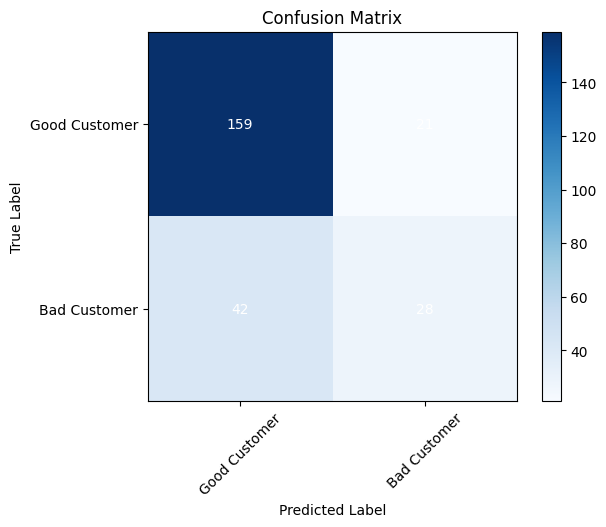

In [21]:
# Assuming y_test and y_pred are your actual and predicted labels
# num_classes is the total number of classes in your classification
num_classes = 2
y_test = np.array(y_test)
y_pred = np.array([naive_bayes(X) for X in X_test])

# Calculate the confusion matrix
conf_matrix = calculate_confusion_matrix(y_test, y_pred, num_classes)

# Plot the confusion matrix
classes = ['Good Customer', 'Bad Customer']
plot_confusion_matrix(conf_matrix, classes)

# ***3. ML Model 2***



### **RANDOM FOREST**

In [22]:
X_testF=X_test
X_trainF=X_train

In [23]:
# import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None, category=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        self.category = category

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh, is_categorical = self._best_split(X, y, feat_idxs)

        if is_categorical:
            left_mask = X[:, best_feature] == best_thresh
            right_mask = ~left_mask
        else:
            left_mask = X[:, best_feature] <= best_thresh
            right_mask = ~left_mask

        left = self._grow_tree(X[left_mask, :], y[left_mask], depth + 1)
        right = self._grow_tree(X[right_mask, :], y[right_mask], depth + 1)

        return Node(best_feature, best_thresh, left=left, right=right, category=is_categorical)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold, is_categorical = None, None, None

        for feat_idx in feat_idxs:
            unique_values = np.unique(X[:, feat_idx])

            for val in unique_values:
                gain = self._information_gain(y, X[:, feat_idx], val)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = val
                    is_categorical = True if isinstance(val, (str, np.str_)) else False

        return split_idx, split_threshold, is_categorical

    def _information_gain(self, y, X_column, threshold):
        parent_gini = self._gini(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        g_l, g_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
        child_gini = (n_l / n) * g_l + (n_r / n) * g_r

        information_gain = parent_gini - child_gini
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _gini(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        gini = 1 - np.sum(np.square(ps))
        return gini

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if node.category:
            if x[node.feature] == node.threshold:
                return self._traverse_tree(x, node.left)
            else:
                return self._traverse_tree(x, node.right)
        else:
            if x[node.feature] <= node.threshold:
                return self._traverse_tree(x, node.left)
            else:
                return self._traverse_tree(x, node.right)

In [24]:
tree = DecisionTree(min_samples_split=12, max_depth=5, n_features=None)
tree.fit(X_trainF, y_train)
predictions = tree.predict(X_testF)
correct_predictions = sum(predictions == y_test)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 73.20%


In [25]:
X_testF=X_test
X_trainF=X_train

In [26]:
import numpy as np

class RandomForest:
    def __init__(self, n_trees=4, bootstrap_size=None, **tree_params):
        self.n_trees = n_trees
        self.bootstrap_size = bootstrap_size
        self.tree_params = tree_params
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            tree = DecisionTree(**self.tree_params)
            # Randomly sample with replacement for each tree
            sample_indices = np.random.choice(len(X), size=self.bootstrap_size, replace=True)
            X_sampled, y_sampled = X[sample_indices], y[sample_indices]
            tree.fit(X_sampled, y_sampled)
            self.trees.append(tree)

    def predict(self, X):
        # Make predictions for each tree and take a majority vote
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Use the mode function to get the most common prediction for each sample
        mode_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return mode_predictions

# Instantiate the RandomForest class with 4 trees and a bootstrap size of 90% of the training data
random_forest = RandomForest(n_trees=15, bootstrap_size=int(0.9* len(X_train)), min_samples_split=10, max_depth=6, n_features=None)

# Training the random forest
random_forest.fit(X_train, y_train)

# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate accuracy
correct_predictions = sum(predictions == y_test)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 78.40%


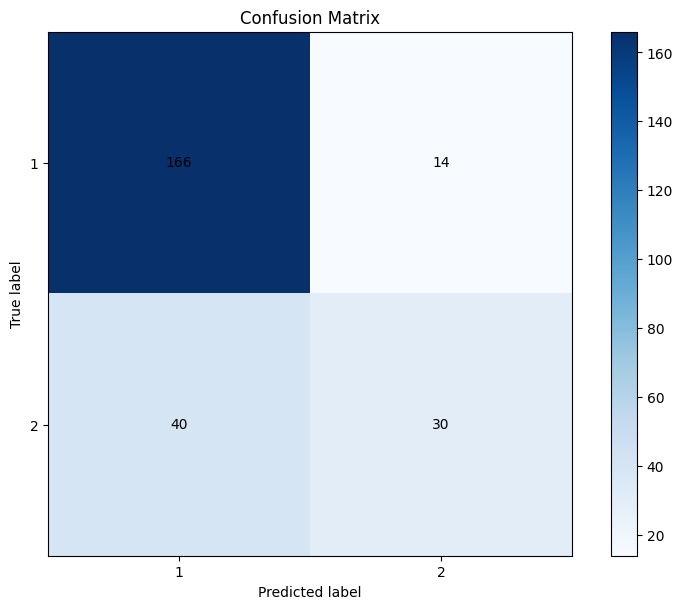

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    n_classes = len(unique_classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        cm[true-1, pred-1] += 1

    return cm, unique_classes

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Assuming y_test and predictions contain the ground truth and predicted labels
# Calculate confusion matrix and get unique classes
cm, classes = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes)


# ***4. ML Model 3 (Based on research literature)***

### **ARTIFICAL NEURAL NETWORK**

Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and functioning of the human brain. Comprising interconnected nodes, or artificial neurons, organized into layers, ANNs are designed to learn and make predictions from data. Information is processed through the network by adjusting the strengths of connections (weights) between neurons during a training phase. ANNs can handle complex relationships and patterns in data, making them particularly effective for tasks such as image and speech recognition, natural language processing, and various other applications. Deep learning, a subfield of machine learning, has gained prominence with the development of deep neural networks, which involve multiple hidden layers, enabling the extraction of hierarchical features from input data. Despite their powerful capabilities, the training of ANNs requires substantial computational resources, and the interpretability of their decision-making process can be challenging. ANNs continue to be at the forefront of advancements in artificial intelligence, contributing to breakthroughs in various DOMAINS

In [28]:
def one_hot_encode_all_features(data):
    # Apply one-hot encoding to the entire DataFrame
    encoded_data = pd.get_dummies(pd.DataFrame(data), dtype=int)

    # Transpose the encoded data and return values
    return encoded_data.values


In [29]:
# Encode features for the training data
X_trainN = one_hot_encode_all_features(X_train).T

# Encode features for the testing data
X_testN = one_hot_encode_all_features(X_test).T


In [30]:
# Get the shape of the encoded training data
c, r = X_trainN.shape

# Print the shape values (rows and columns)
print(c, ",", r)


89 , 750


In [31]:
def init_params():
    # Initialize parameters W1, b1, W2, b2 with random values
    W1 = np.random.rand(6, c)  # Shape: (6, c)
    b1 = np.random.rand(6, 1)  # Shape: (6, 1)
    W2 = np.random.rand(2, 6)  # Shape: (2, 6)
    b2 = np.random.rand(2, 1)  # Shape: (2, 1)

    # Return the initialized parameters
    return W1, b1, W2, b2


In [32]:
def ReLU(Z):
    # Apply ReLU activation function element-wise
    return np.maximum(Z, 0)


In [33]:
def softmax(Z):
    # Compute softmax activation function
    numerator = np.exp(Z)
    denominator = np.sum(np.exp(Z), axis=0)

    # Calculate softmax output
    A = numerator / denominator

    return A


In [34]:
def forward_prop(W1, b1, W2, b2, X):
    # Calculate the first layer values
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    # Calculate the second layer values
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    # Return the intermediate and final values
    return Z1, A1, Z2, A2


In [35]:
def ReLU_deriv(Z):
    # Derivative of ReLU activation function
    return Z > 0


In [36]:
def one_hot(Y):
    one_hot_Y = pd.get_dummies(Y).T
    return one_hot_Y.values


In [37]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Perform one-hot encoding on Y
    one_hot_Y = one_hot(Y)

    # Calculate derivatives for the output layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / r * dZ2.dot(A1.T)
    db2 = 1 / r * np.sum(dZ2)

    # Calculate derivatives for the hidden layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / r * dZ1.dot(X.T)
    db1 = 1 / r * np.sum(dZ1)

    # Return the computed derivatives
    return dW1, db1, dW2, db2


In [38]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Update weights and biases using gradient descent
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    # Return the updated parameters
    return W1, b1, W2, b2


In [39]:
def get_predictions(A2):
    for i in range(len(A2[0])):
        # Compare values to assign predictions
        if A2[0][i] >= A2[1][i]:
            A2[0][i] = 1
            A2[1][i] = 0
        else:
            A2[0][i] = 0
            A2[1][i] = 1

    # Return the updated predictions
    return A2

In [40]:
def get_accuracy(predictions, Y):
    # Convert Y to one-hot encoding
    Y_N = one_hot(Y)

    # Initialize count for correct predictions
    count = 0

    # Calculate accuracy by comparing predictions with one-hot encoded Y
    for i in range(len(Y_N[0])):
        if Y_N[1][i] == predictions[1][i]:
            count += 1

    # Return the calculated accuracy
    return count / len(Y_N[0])


In [41]:
def gradient_descent(X, Y, alpha, iterations):
    # Initialize parameters
    W1, b1, W2, b2 = init_params()

    # Iteratively update parameters
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Print progress every 10 iterations
        if i % 10 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y) * 100
            print(f"Accuracy on training set: {accuracy}%")

    return W1, b1, W2, b2


In [42]:
print(one_hot(y_train))

[[0 1 1 ... 0 1 1]
 [1 0 0 ... 1 0 0]]


In [43]:
# Train the neural network using gradient descent
W1, b1, W2, b2 = gradient_descent(X_trainN, y_train, 0.1, 1000)

Iteration: 0
Accuracy on training set: 69.33333333333334%
Iteration: 10
Accuracy on training set: 35.733333333333334%
Iteration: 20
Accuracy on training set: 30.666666666666664%
Iteration: 30
Accuracy on training set: 69.33333333333334%
Iteration: 40
Accuracy on training set: 30.666666666666664%
Iteration: 50
Accuracy on training set: 69.33333333333334%
Iteration: 60
Accuracy on training set: 69.33333333333334%
Iteration: 70
Accuracy on training set: 69.33333333333334%
Iteration: 80
Accuracy on training set: 69.46666666666667%
Iteration: 90
Accuracy on training set: 69.86666666666666%
Iteration: 100
Accuracy on training set: 70.8%
Iteration: 110
Accuracy on training set: 70.39999999999999%
Iteration: 120
Accuracy on training set: 70.39999999999999%
Iteration: 130
Accuracy on training set: 70.39999999999999%
Iteration: 140
Accuracy on training set: 71.06666666666666%
Iteration: 150
Accuracy on training set: 70.39999999999999%
Iteration: 160
Accuracy on training set: 71.33333333333334%
I

In [44]:
def make_predictions(X, W1, b1, W2, b2):
    # Perform forward propagation to get predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)

    # Return the predictions
    return predictions

In [45]:
# Generate predictions on the test set
test_predictions = make_predictions(X_testN, W1, b1, W2, b2)

# Calculate accuracy on the testing set
accuracy = get_accuracy(test_predictions, y_test) * 100
print(f"Accuracy on testing set: {accuracy}%")


Accuracy on testing set: 74.8%


Out of the following models, we notice Random Forest with the highest accuracy on classification of customers, an expected result of an ensemble model such as this. The decision stumps generalize well over the dataset without overfitting.

Meanwhile, the Artificial Neural Network scores an accuracy of 76% due to the simplicity of the model. With a single hidden layer composed of 6 neurons, it fails to capture the complexity of the credit card dataset.

The Fischer’s Linear Discriminant model scores the least in terms of accuracy due to the nature of the dataset. The model does not fit well on a dataset with discretized nominal values.

# ***5. ML Model 4***

## FISHER'S LDA ##


In [46]:
# Identify the indices where the columns are categorical
categorical_columns = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19, 20]

# Apply one-hot encoding to the entire dataset
X_encoded = pd.get_dummies(pd.DataFrame(np.concatenate((X_train, X_test), axis=0), columns=header[:-1]))

# Separate back into training and test sets
X_train_encoded = X_encoded[:len(X_train)]
X_test_encoded = X_encoded[len(X_train):]

# Convert to NumPy arrays
X_train = X_train_encoded.values
X_test = X_test_encoded.values

In [47]:
import numpy as np
import pandas as pd

# Convert Pandas DataFrames to NumPy arrays
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Function to calculate mean vectors for each class
def calculate_class_means(X, y):
    classes = np.unique(y)
    means = []
    for c in classes:
        class_mean = np.mean(X[y.flatten() == c], axis=0)
        means.append(class_mean)
    return np.array(means)


class1_means = np.zeros((1, X_train.shape[1]))
class2_means = np.zeros((1, X_train.shape[1]))
class1_size = 0
class2_size = 0

feature_ds1 = []
feature_ds2 = []

for i in range(len(X_train)):
  if(y_train[i] == 1):
    class1_means += X_train[i]
    class1_size += 1
    feature_ds1.append(X_train[i])
  else:
    class2_means += X_train[i]
    class2_size += 1
    feature_ds2.append(X_train[i])

S_b = class1_means - class2_means

sum1 = np.zeros((X_train.shape[1], X_train.shape[1]))
sum2 = np.zeros((X_train.shape[1], X_train.shape[1]))

for i in range(len(X_train)):
  if(y_train[i] == 1):
    diff = X_train[i] - class1_means
    sum1 = sum1 + np.matmul(np.transpose(diff), diff)
  else:
    diff = X_train[i] - class2_means
    sum2 = sum2 + np.matmul(np.transpose(diff), diff)

a = sum1/class1_size
b = sum2/class2_size

sw = a + b

w = np.matmul(S_b, np.linalg.inv(sw))


means = calculate_class_means(X_train,y_train)



def calculate_within_class_scatter(X, y):
    classes = np.unique(y)
    S_w = np.zeros((X.shape[1], X.shape[1]))

    for c in classes:
        class_samples = X[y.flatten() == c]
        class_mean = means[c-1]
        m,n=class_samples.shape
        difference=np.zeros((m,n))
        for i in range(m):
          difference[i]=(class_samples[i]-class_mean)
        class_scatter = np.dot((difference).T, (difference))
        S_w += class_scatter
    return S_w



proj1 = np.dot(feature_ds1, np.transpose(w))
proj2 = np.dot(feature_ds2, np.transpose(w))

X_test_lda = np.dot(X_test,np.transpose(w))

accuracy = 0
true_pos = 0
true_neg=0
false_pos=0
false_neg=0
for i in range(len(X_test)):
  testproj = np.dot(X_test[i], np.transpose(w))
  prob1 = (1/(proj1.std()*np.sqrt(2*np.pi))) * np.exp((-0.5) * np.square((testproj[0]-proj1.mean())/proj1.std()))
  prob2 = (1/(proj2.std()*np.sqrt(2*np.pi))) * np.exp((-0.5) * np.square((testproj[0]-proj2.mean())/proj2.std()))
  prediction = 1
  if(prob2 > prob1 and y_test[i] == 2):
    true_pos += 1
    accuracy += 1
  elif(prob1 >= prob2 and y_test[i] == 1):
    true_neg += 1
    accuracy += 1
  elif(prob1 >= prob2 and y_test[i] == 2):
    false_neg +=1
  else:
    false_pos += 1

print(f"Accuracy: {accuracy*100/len(y_test)}%")
print(f"True Positive: {true_pos*100/len(y_test)}%")
print(f"True negative: {true_neg*100/len(y_test)}%")
print(f"False Positive: {false_pos*100/len(y_test)}%")
print(f"False Negative: {false_neg*100/len(y_test)}%")

Accuracy: 66.4%
True Positive: 22.0%
True negative: 44.4%
False Positive: 27.6%
False Negative: 6.0%


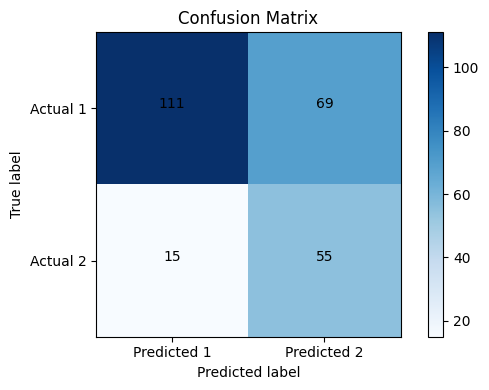

In [48]:
import matplotlib.pyplot as plt

# Define the confusion matrix values
conf_matrix = [[true_neg, false_pos], [false_neg, true_pos]]

# Create the confusion matrix plot
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add annotations to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i][j]), horizontalalignment='center', color='white' if conf_matrix[i][j] > (np.sum(conf_matrix) / 2) else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['Predicted 1', 'Predicted 2'])
plt.yticks([0, 1], ['Actual 1', 'Actual 2'])
plt.tight_layout()
plt.show()


# ***6. Comparison of insights drawn from the models***

Fisher's Linear Discriminant Analysis (LDA) is a statistical technique employed in pattern recognition and classification to discern a linear combination of input features that best characterizes or distinguishes between two or more classes within a dataset. This method aims to maximize the separation between different classes while simultaneously minimizing the variability within each class. At its core, Fisher's LDA seeks to find a projection vector in the feature space that optimally captures the distinctions between classes, essentially maximizing the ratio of between-class variance to within-class variance. This technique is particularly valuable for dimensionality reduction and feature extraction, providing a linear discriminant that can be used as a decision rule for classifying new observations based on their feature values.

# **_7. References_**

1.  https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee
2.  https://towardsdatascience.com/the-heart-of-artificial-neural-networks-26627e8c03ba

    ‘Research Paper on Basic of Artificial Neural Network’ by Sonali B.Maind and Priyanka Wankar.

